<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/GabrielDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ByGabriel.csv to ByGabriel.csv


In [3]:
gabrielDataset_Actual = pd.read_csv(io.BytesIO(uploaded['ByGabriel.csv']))
gabrielDataset_Actual_Copy = gabrielDataset_Actual.copy()
print('Actual shape of dataset before any processing: ',gabrielDataset_Actual_Copy.shape)
actual_Rows = gabrielDataset_Actual_Copy.shape[0]
gabrielDataset_Actual_Copy = gabrielDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',gabrielDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = gabrielDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Gabriel Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (253680, 22)
Shape of dataset after removing the duplicates:  (229781, 22)
No.of Duplicate rows in the Gabriel Dataset =  23899


In [4]:
# @ Printing Sample Data
gabrielDataset_Actual_Copy.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
gabrielDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

In [6]:
gabrielDataset_Actual_Copy.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
gabrielDataset_Actual_Copy.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

**If the number of unique values of a feature is < 20 then it is categorical feature else it is continous type variable**

Therefore from the above result we can conclude that the features BMI, MentalHealth, GenHealth are of continous type and rest all are of categorical type

In [8]:
gabrielDataset_Actual_Copy.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

From the above we conclude that there are no missing values in the dataset

Text(0.5, 1.0, 'Frequency of people with pre-diabetes (1), diabetes(2) & no diabetes(0)')

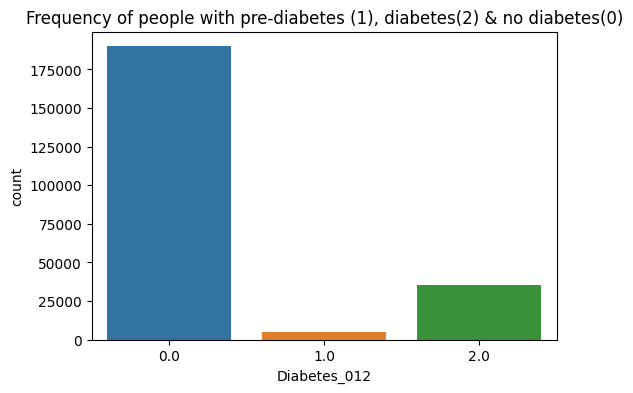

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='Diabetes_012')
plt.title('Frequency of people with pre-diabetes (1), diabetes(2) & no diabetes(0)')

# Distributions of Continous variables ['Age', 'BMI']

Text(0.5, 1.0, 'Distribution of Age')

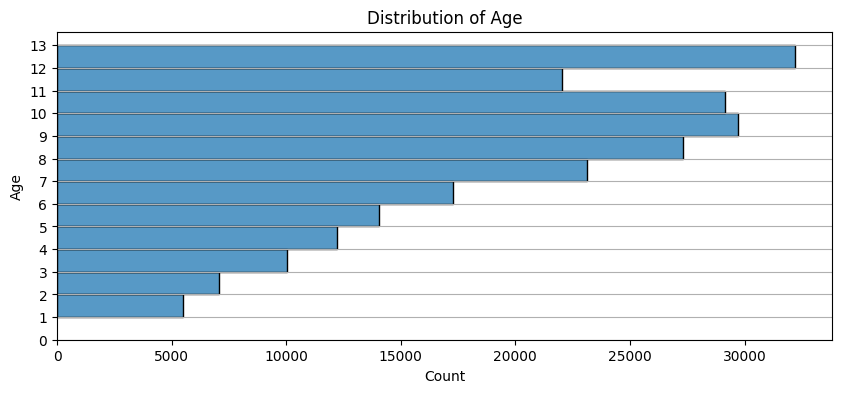

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=gabrielDataset_Actual_Copy, y='Age',binwidth=1,binrange=(1,13)).yaxis.grid(True)
plt.yticks(range(0,14))
plt.title('Distribution of Age')

From the above visual illustration we conclude that there is no age group of <18 in the dataset and most chunk of observations are of Age group between 7-13

Text(0.5, 1.0, 'Distribution of BMI')

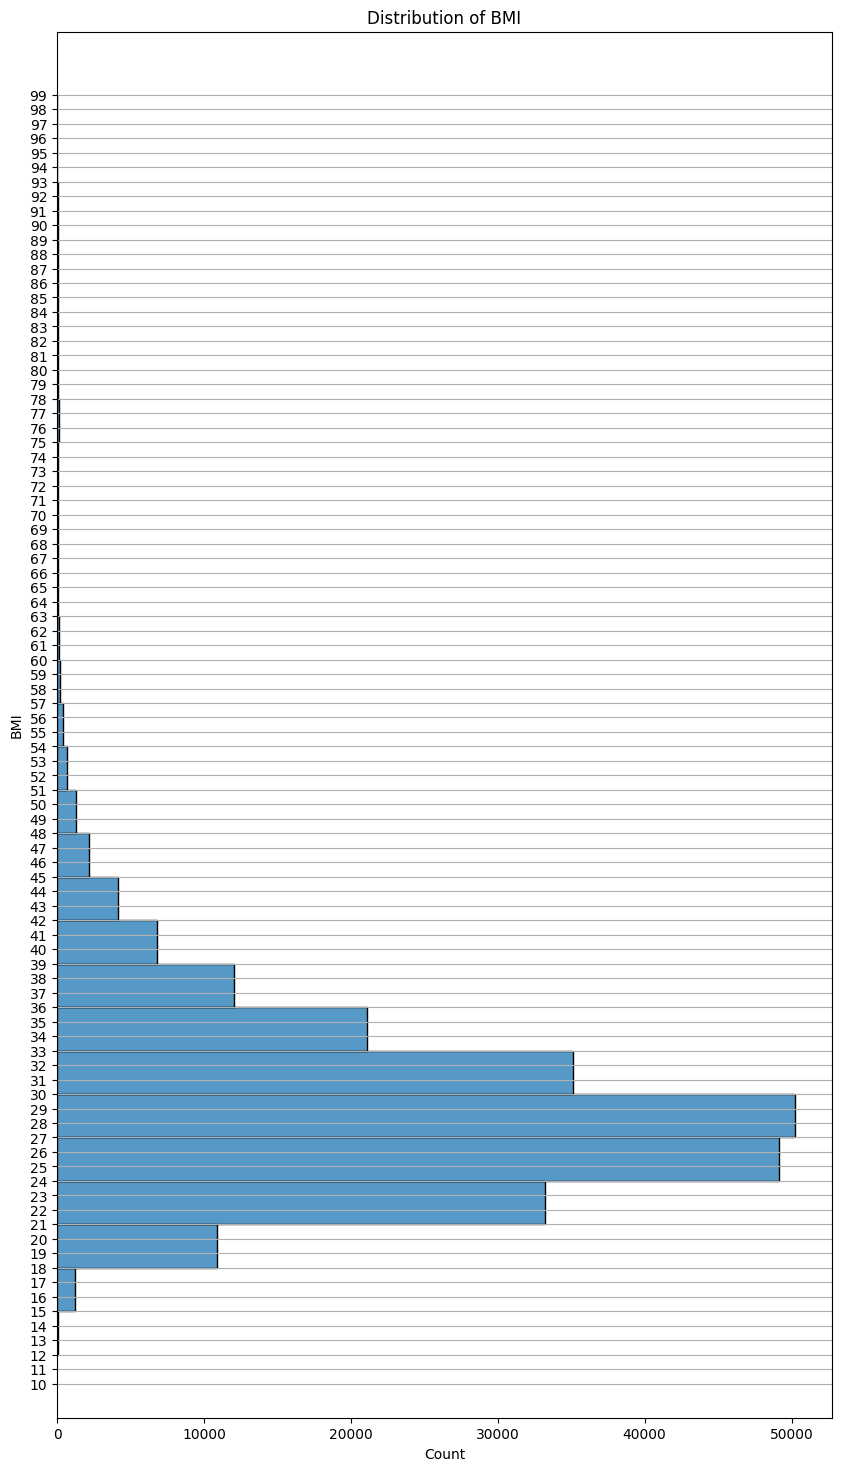

In [11]:
plt.figure(figsize=(10,18))
sns.histplot(data=gabrielDataset_Actual_Copy, y='BMI',binwidth=3).yaxis.grid(True)
plt.yticks(range(10,100))
plt.title('Distribution of BMI')

# Relations(Visual) between target feature Diabetes_012 and Continuous Variables['Age','BMI']

Text(0.5, 1.0, 'Diabetes Distribution by Age')

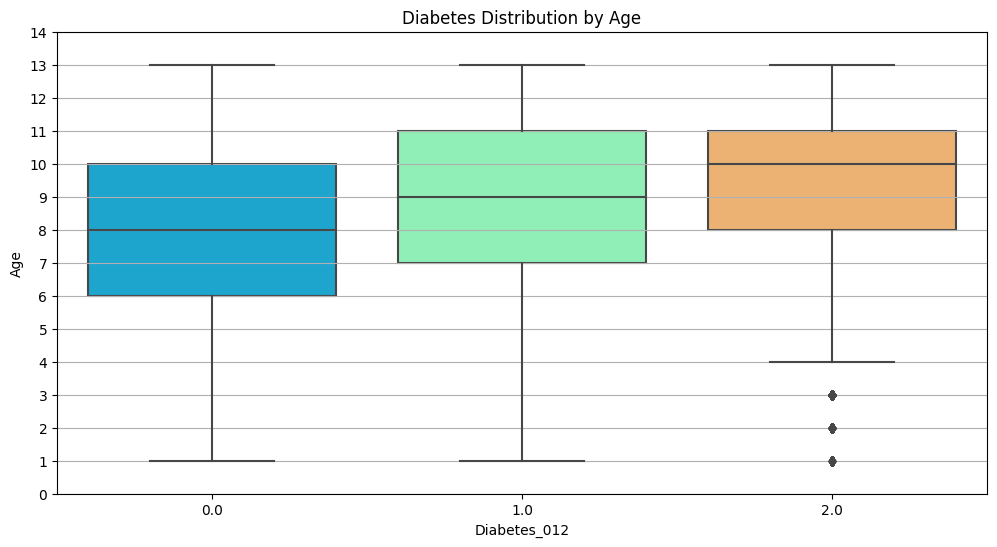

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diabetes_012',y='Age',data=gabrielDataset_Actual_Copy,palette='rainbow').yaxis.grid(True)
plt.yticks(range(0,15))
plt.title('Diabetes Distribution by Age')

Text(0.5, 1.0, 'Diabetes Distribution by BMI')

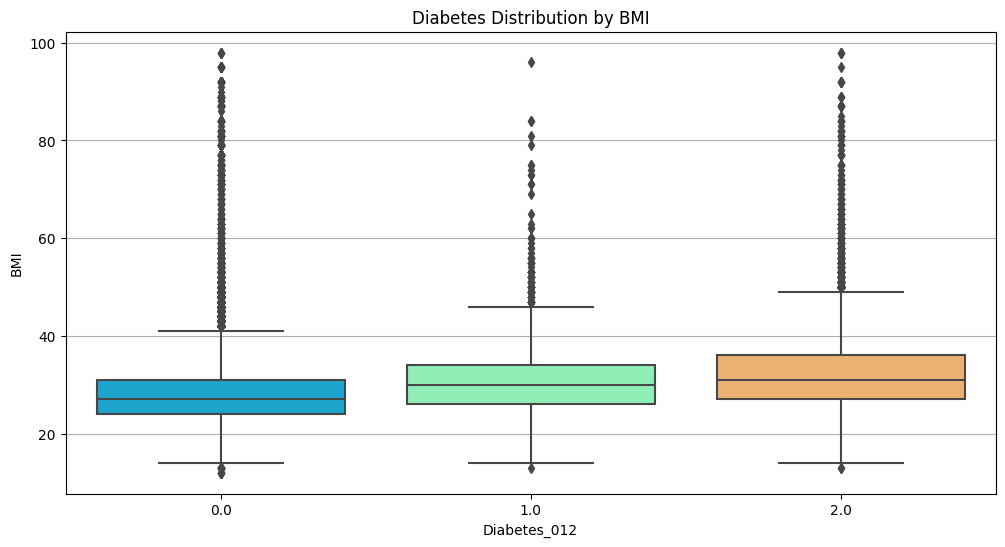

In [13]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Diabetes_012',y='BMI',data=gabrielDataset_Actual_Copy,palette='rainbow').yaxis.grid(True)
plt.title('Diabetes Distribution by BMI')

Text(0.5, 1.0, 'Diabetes Distribution by BMI & Age')

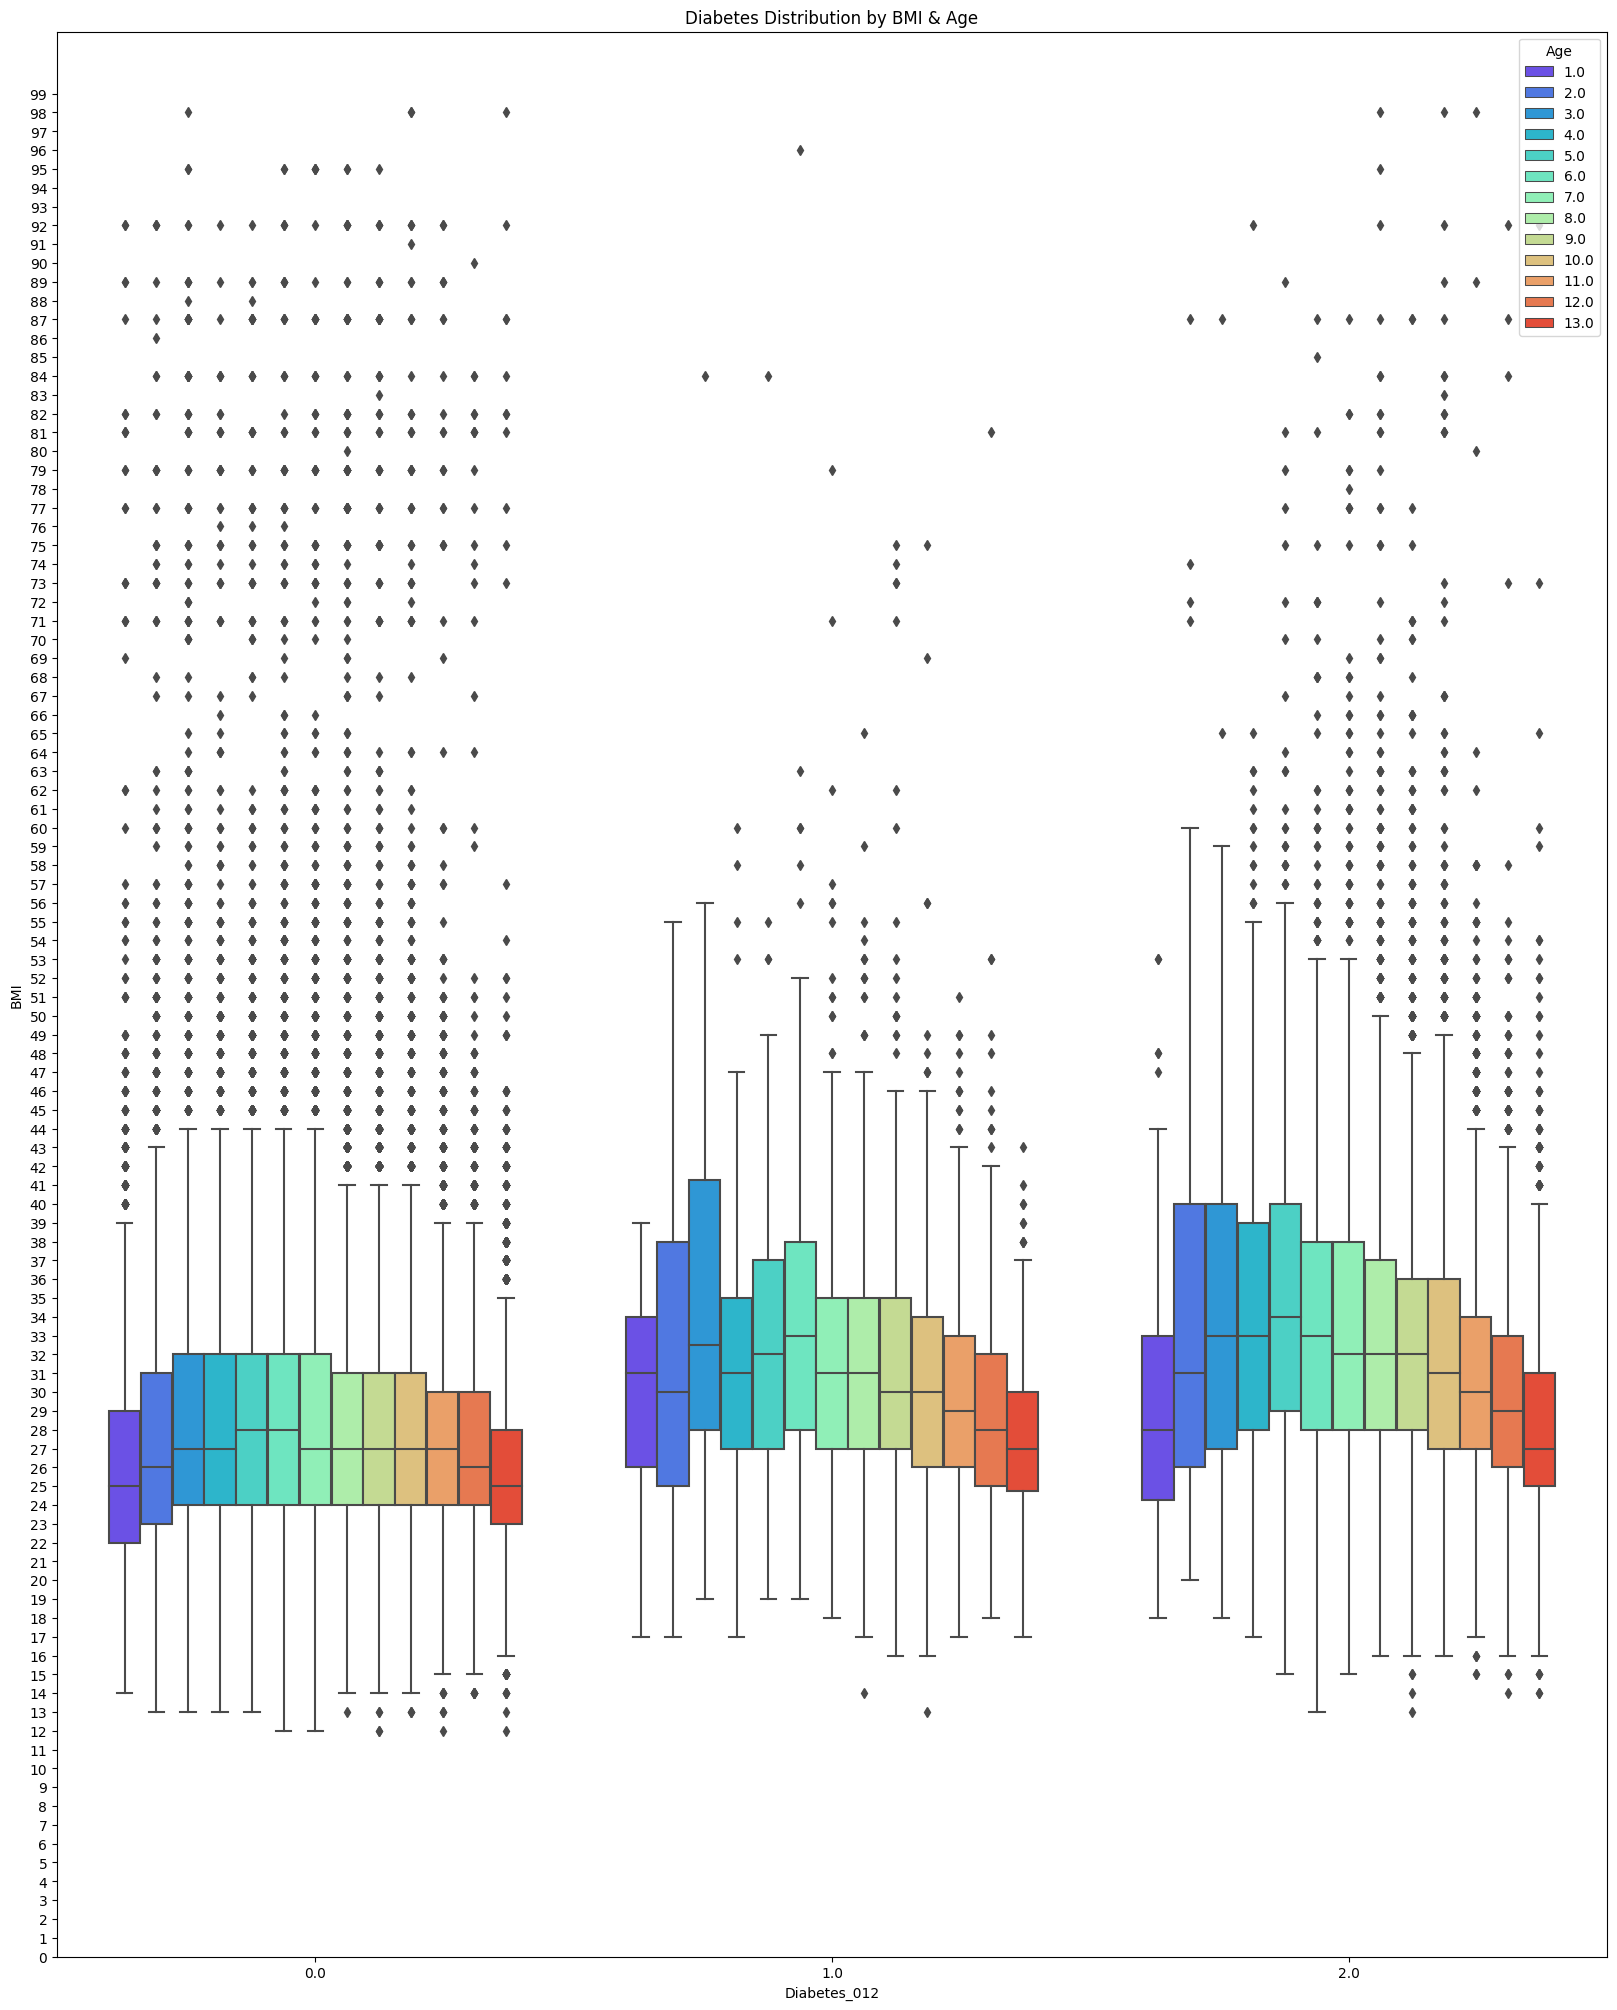

In [14]:
plt.figure(figsize=(20,25))
sns.boxplot(x='Diabetes_012',y='BMI',data=gabrielDataset_Actual_Copy,palette='rainbow',hue='Age')
plt.yticks(range(0,100))
plt.title('Diabetes Distribution by BMI & Age')

# Understanding whether how much does continous variables like Age & BMI are influencing Diabetes through ANOVA Test(Statistical Test)

In [15]:
def FunctionAnova(inputData, targetFeature, predictorVariables):
  selectedPredictors = []
  for predictor in predictorVariables:
    categoryGroupLists = inputData.groupby(targetFeature)[predictor].apply(list)
    anovaResults = f_oneway(*categoryGroupLists)
    if(anovaResults[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(anovaResults[1],50))
  return selectedPredictors


In [16]:
probablePredictorVariables = ['Age','BMI']
FunctionAnova(inputData=gabrielDataset_Actual_Copy, targetFeature='Diabetes_012', predictorVariables=probablePredictorVariables)

Age  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
BMI  is correlated with the target-variable  Diabetes_012  with p-value:  0.0


['Age', 'BMI']

# Distributions of Categorical Variables['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump']

Text(0.5, 1.0, 'Frequency of people who are Smoking in Dataset')

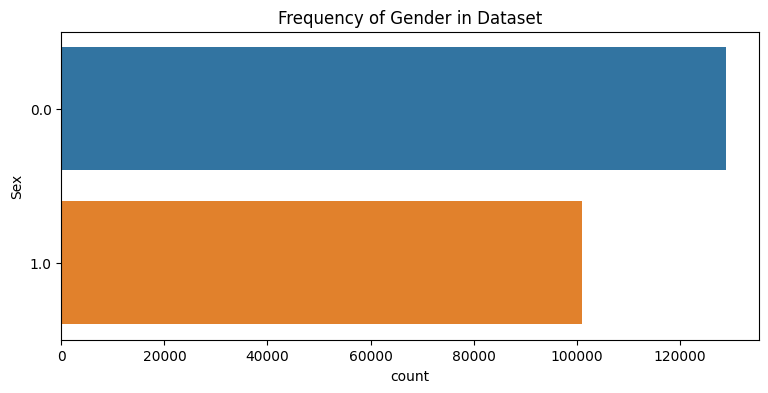

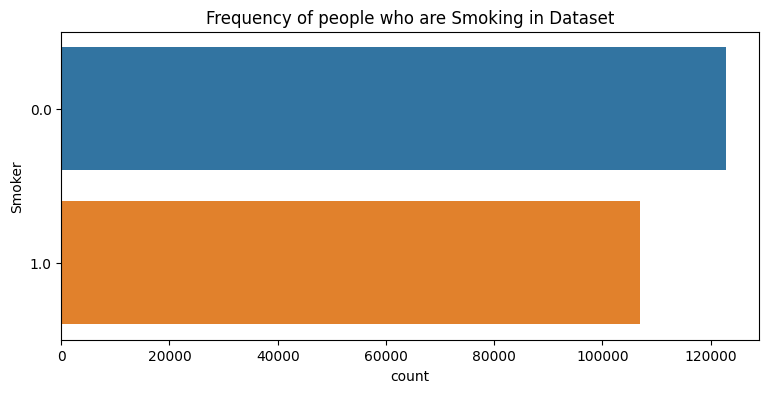

In [17]:
plt.figure(figsize=(9,4))
sns.countplot(y='Sex',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of Gender in Dataset')

plt.figure(figsize=(9,4))
sns.countplot(y='Smoker',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of people who are Smoking in Dataset')

Text(0.5, 1.0, 'Frequency of High-BP people in Dataset')

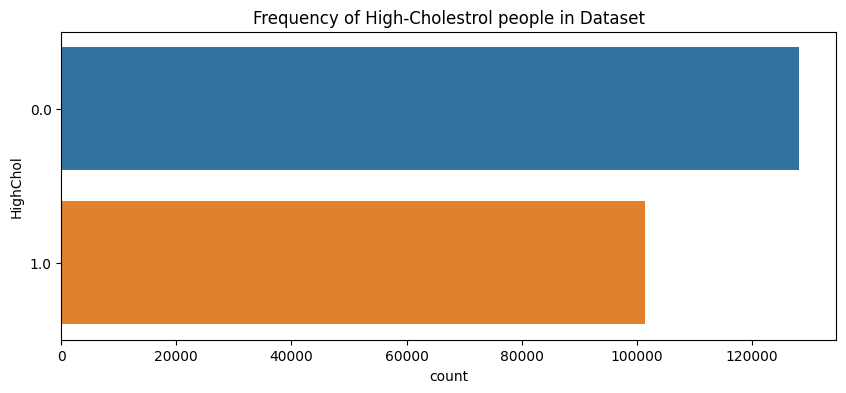

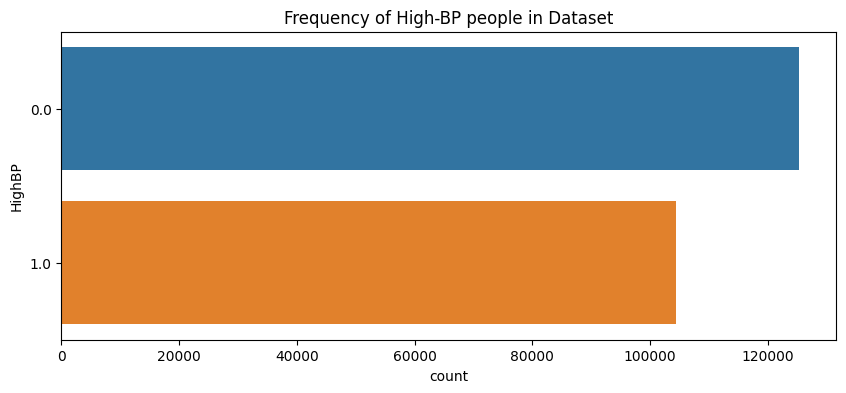

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(y='HighChol',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of High-Cholestrol people in Dataset')

plt.figure(figsize=(10,4))
sns.countplot(y='HighBP',data=gabrielDataset_Actual_Copy)
plt.title('Frequency of High-BP people in Dataset')

Text(0.5, 1.0, 'Frequency of Heavy Alchohol Consumers in Dataset')

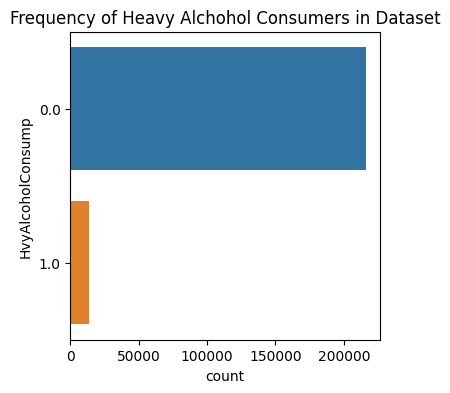

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(data=gabrielDataset_Actual_Copy,y='HvyAlcoholConsump')
plt.title('Frequency of Heavy Alchohol Consumers in Dataset')

# Relations(Visual) between target feature Diabetes_012 and Categorical variables['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump']

Text(0.5, 1.0, 'Variation Diabetes w.r.t Smokers')

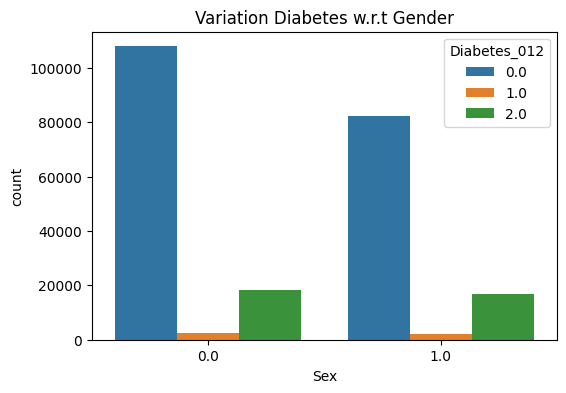

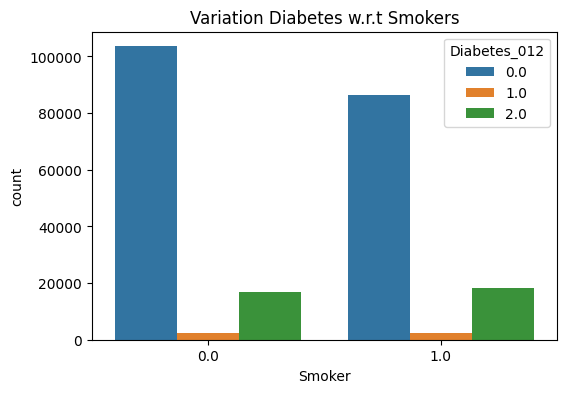

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='Sex', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t Gender')

plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='Smoker', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t Smokers')

Text(0.5, 1.0, 'Variation Diabetes w.r.t people with HighChol')

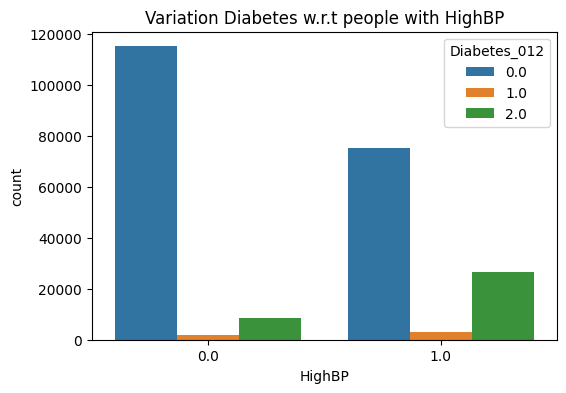

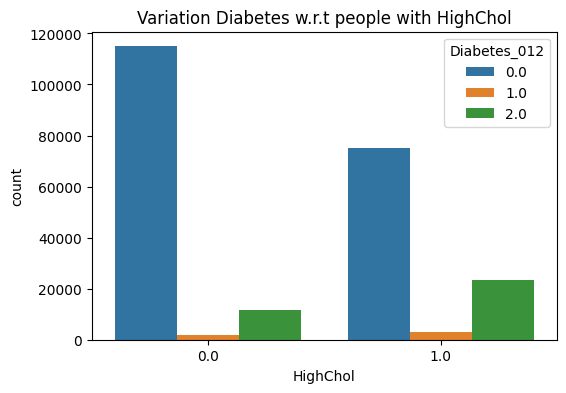

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='HighBP', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t people with HighBP')

plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='HighChol', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t people with HighChol')

Text(0.5, 1.0, 'Variation Diabetes w.r.t people with Heavy Alchohol Consumers')

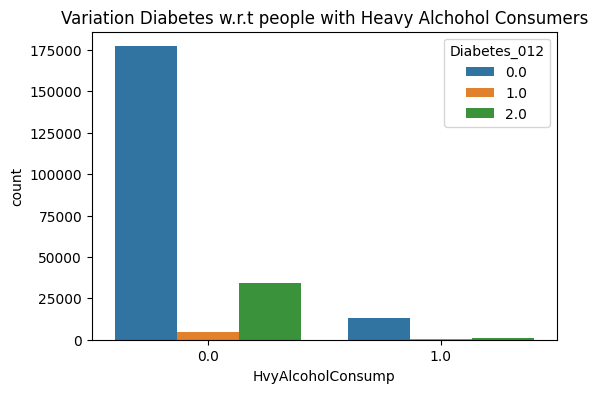

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=gabrielDataset_Actual_Copy, x='HvyAlcoholConsump', hue='Diabetes_012')
plt.title('Variation Diabetes w.r.t people with Heavy Alchohol Consumers')

# Understanding whether how much does categorical variables like ['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump'] are influencing Diabetes through Cho-Square Test(Statistical Test)

In [23]:
def chiSquareTestFunction(inputData, targetFeature, predictorVariables):
  selectedPredictors=[]
  for predictor in predictorVariables:
    crossTableResults = pd.crosstab(index=inputData[targetFeature],columns=inputData[predictor])
    chisquareResult = chi2_contingency(crossTableResults)
    if(chisquareResult[1] < 0.05):
      print(predictor, ' is correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
      selectedPredictors.append(predictor)
    else:
      print(predictor, ' is NOT correlated with the target-variable ', targetFeature, ' with p-value: ', round(chisquareResult[1],50))
  return selectedPredictors

In [24]:
probableCategoricalPredictorVariables = ['Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump']
chiSquareTestFunction(inputData=gabrielDataset_Actual_Copy, targetFeature='Diabetes_012', predictorVariables=probableCategoricalPredictorVariables)

Sex  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
HighChol  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
HighBP  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
Smoker  is correlated with the target-variable  Diabetes_012  with p-value:  0.0
HvyAlcoholConsump  is correlated with the target-variable  Diabetes_012  with p-value:  0.0


['Sex', 'HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump']

# Selecting final predictors from Gabriel's Dataset

In [30]:
gabrielDataset_Actual_Copy.rename(columns = {'Diabetes_012': 'Diabetes','Sex':'Gender'},inplace=True)
selectedFeatures = ['Age','BMI','Sex','HighChol','HighBP','Smoker','HvyAlcoholConsump','Diabetes']
gabrielDataset_Actual_Copy = gabrielDataset_Actual_Copy[selectedFeatures]
gabrielDataset_Actual_Copy.head(15)

,Age,BMI,Sex,HighChol,HighBP,Smoker,HvyAlcoholConsump,Diabetes
0,9.0,40.0,0.0,1.0,1.0,1.0,0.0,0.0
1,7.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9.0,28.0,0.0,1.0,1.0,0.0,0.0,0.0
3,11.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11.0,24.0,0.0,1.0,1.0,0.0,0.0,0.0
5,10.0,25.0,1.0,1.0,1.0,1.0,0.0,0.0
6,9.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
7,11.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0
8,9.0,30.0,0.0,1.0,1.0,1.0,0.0,2.0
9,8.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0
